## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression 

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 84 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]    0.407  0.494  -0.465    1.339      0.053    0.030      85.0   
betas[1]    0.504  0.311  -0.059    1.105      0.048    0.026      42.0   
betas[2]    0.410  0.465  -0.443    1.248      0.039    0.016     140.0   
betas[3]    0.528  0.438  -0.332    1.342      0.042    0.022     111.0   
betas[4]    0.117  0.353  -0.563    0.740      0.043    0.019      67.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[450]  0.000  0.001   0.000    0.000      0.000    0.000      81.0   
theta[451]  0.182  0.084   0.047    0.343      0.007    0.004     135.0   
theta[452]  0.002  0.002   0.000    0.005      0.000    0.000     284.0   
theta[453]  0.939  0.035   0.875    0.991      0.002    0.002     189.0   
theta[454]  0.025  0.013   0.005    0.048      0.001    0.000     121.0   

            ess_tail  r_hat  
betas[0]       125.0   1.02  
betas[1]        63.0   1.04  
betas[2] 

/opt/conda/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (485) in plot_posterior, generating only 40 plots
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (970) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'betas\n0, 0'}>,
        <Axes: title={'center': 'betas\n0, 1'}>,
        <Axes: title={'center': 'betas\n0, 2'}>,
        <Axes: title={'center': 'betas\n0, 3'}>],
       [<Axes: title={'center': 'betas\n0, 4'}>,
        <Axes: title={'center': 'betas\n0, 5'}>,
        <Axes: title={'center': 'betas\n0, 6'}>,
        <Axes: title={'center': 'betas\n0, 7'}>],
       [<Axes: title={'center': 'betas\n0, 8'}>,
        <Axes: title={'center': 'betas\n0, 9'}>,
        <Axes: title={'center': 'betas\n0, 10'}>,
        <Axes: title={'center': 'betas\n0, 11'}>],
       [<Axes: title={'center': 'betas\n0, 12'}>,
        <Axes: title={'center': 'betas\n0, 13'}>,
        <Axes: title={'center': 'betas\n0, 14'}>,
        <Axes: title={'center': 'betas\n0, 15'}>],
       [<Axes: title={'center': 'betas\n0, 16'}>,
        <Axes: title={'center': 'betas\n0, 17'}>,
        <Axes: title={'center': 'betas\n0, 18'}>,
        <Axes: title={'center': 'betas\n0, 19'}>],
     

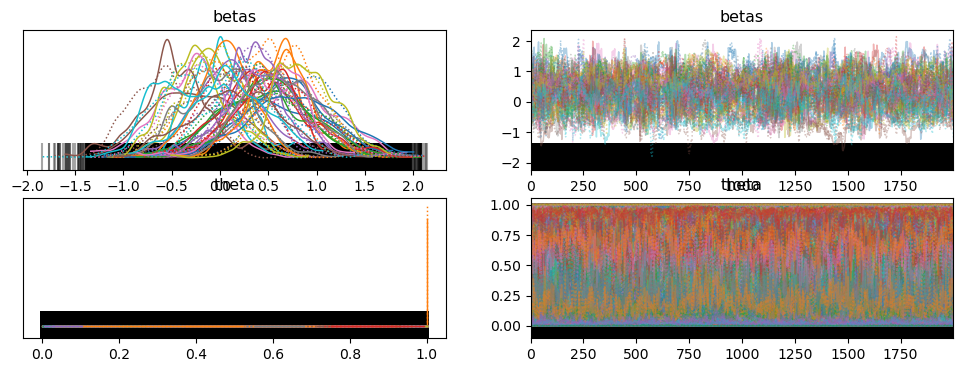

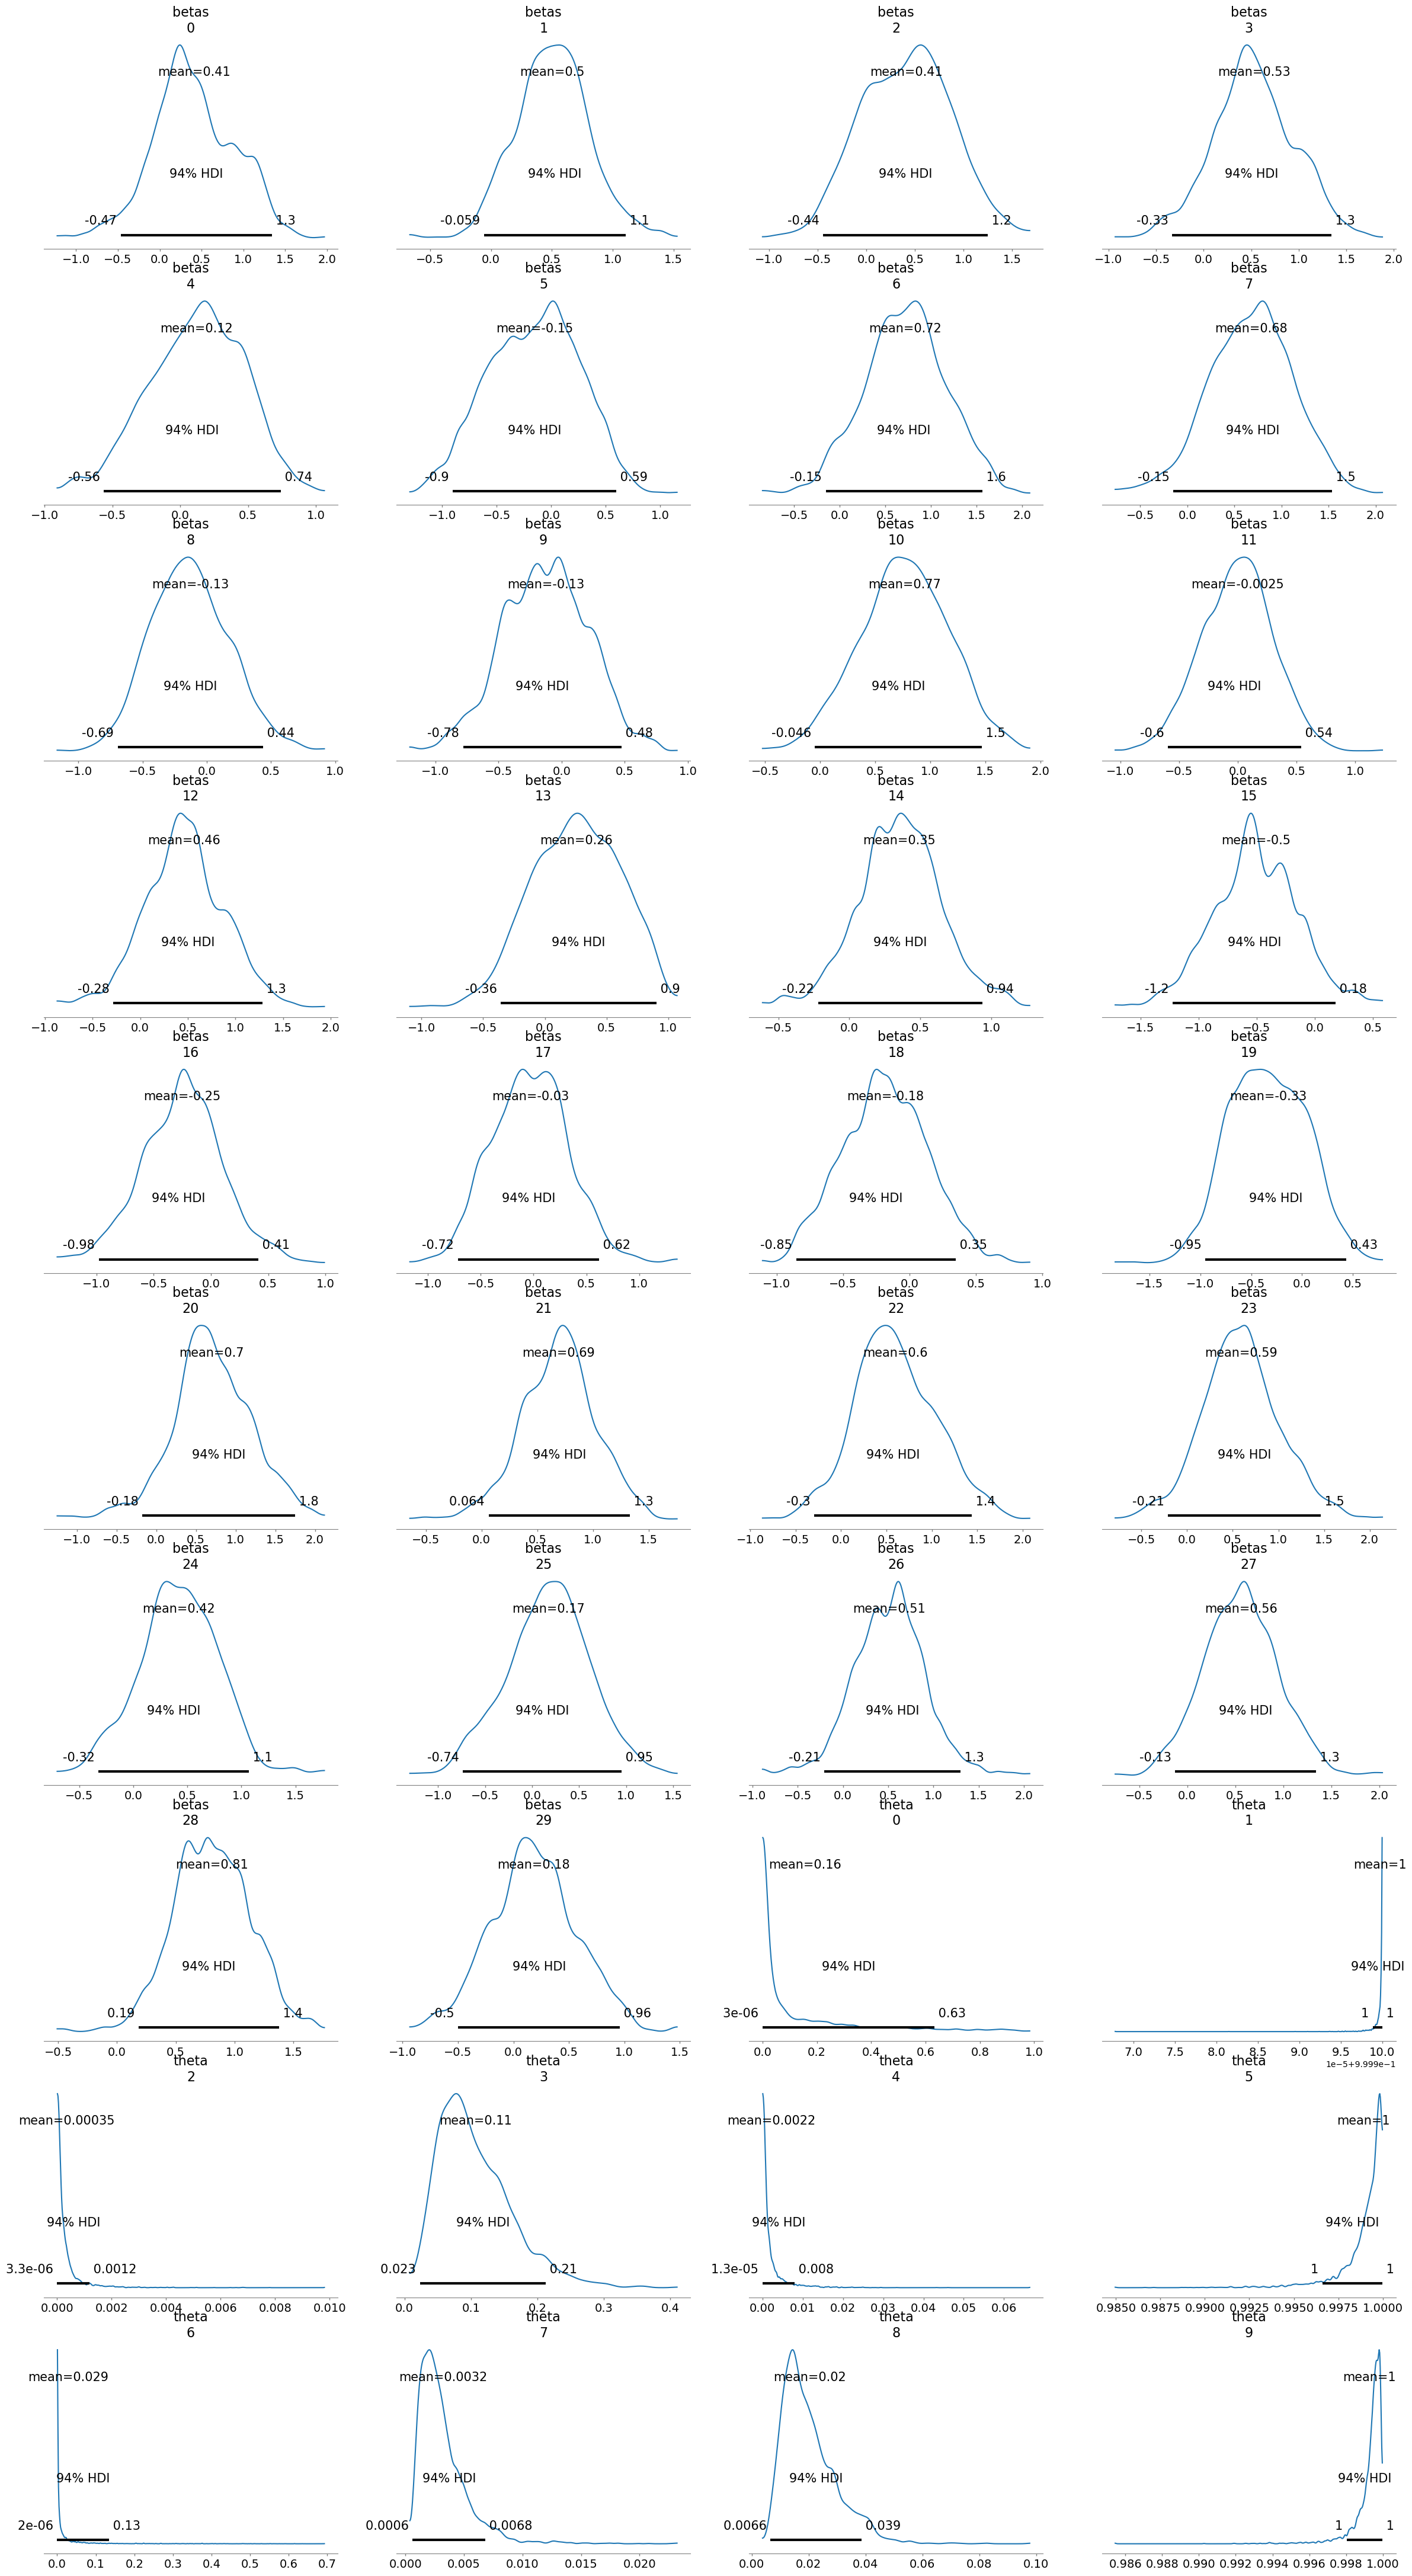

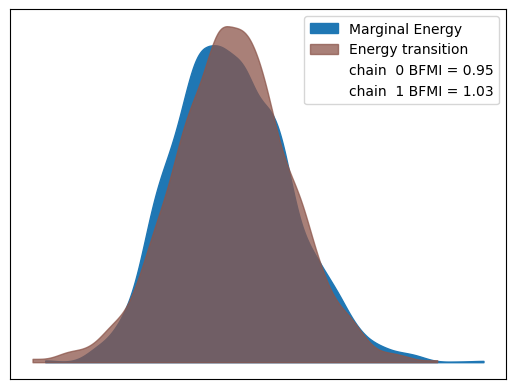

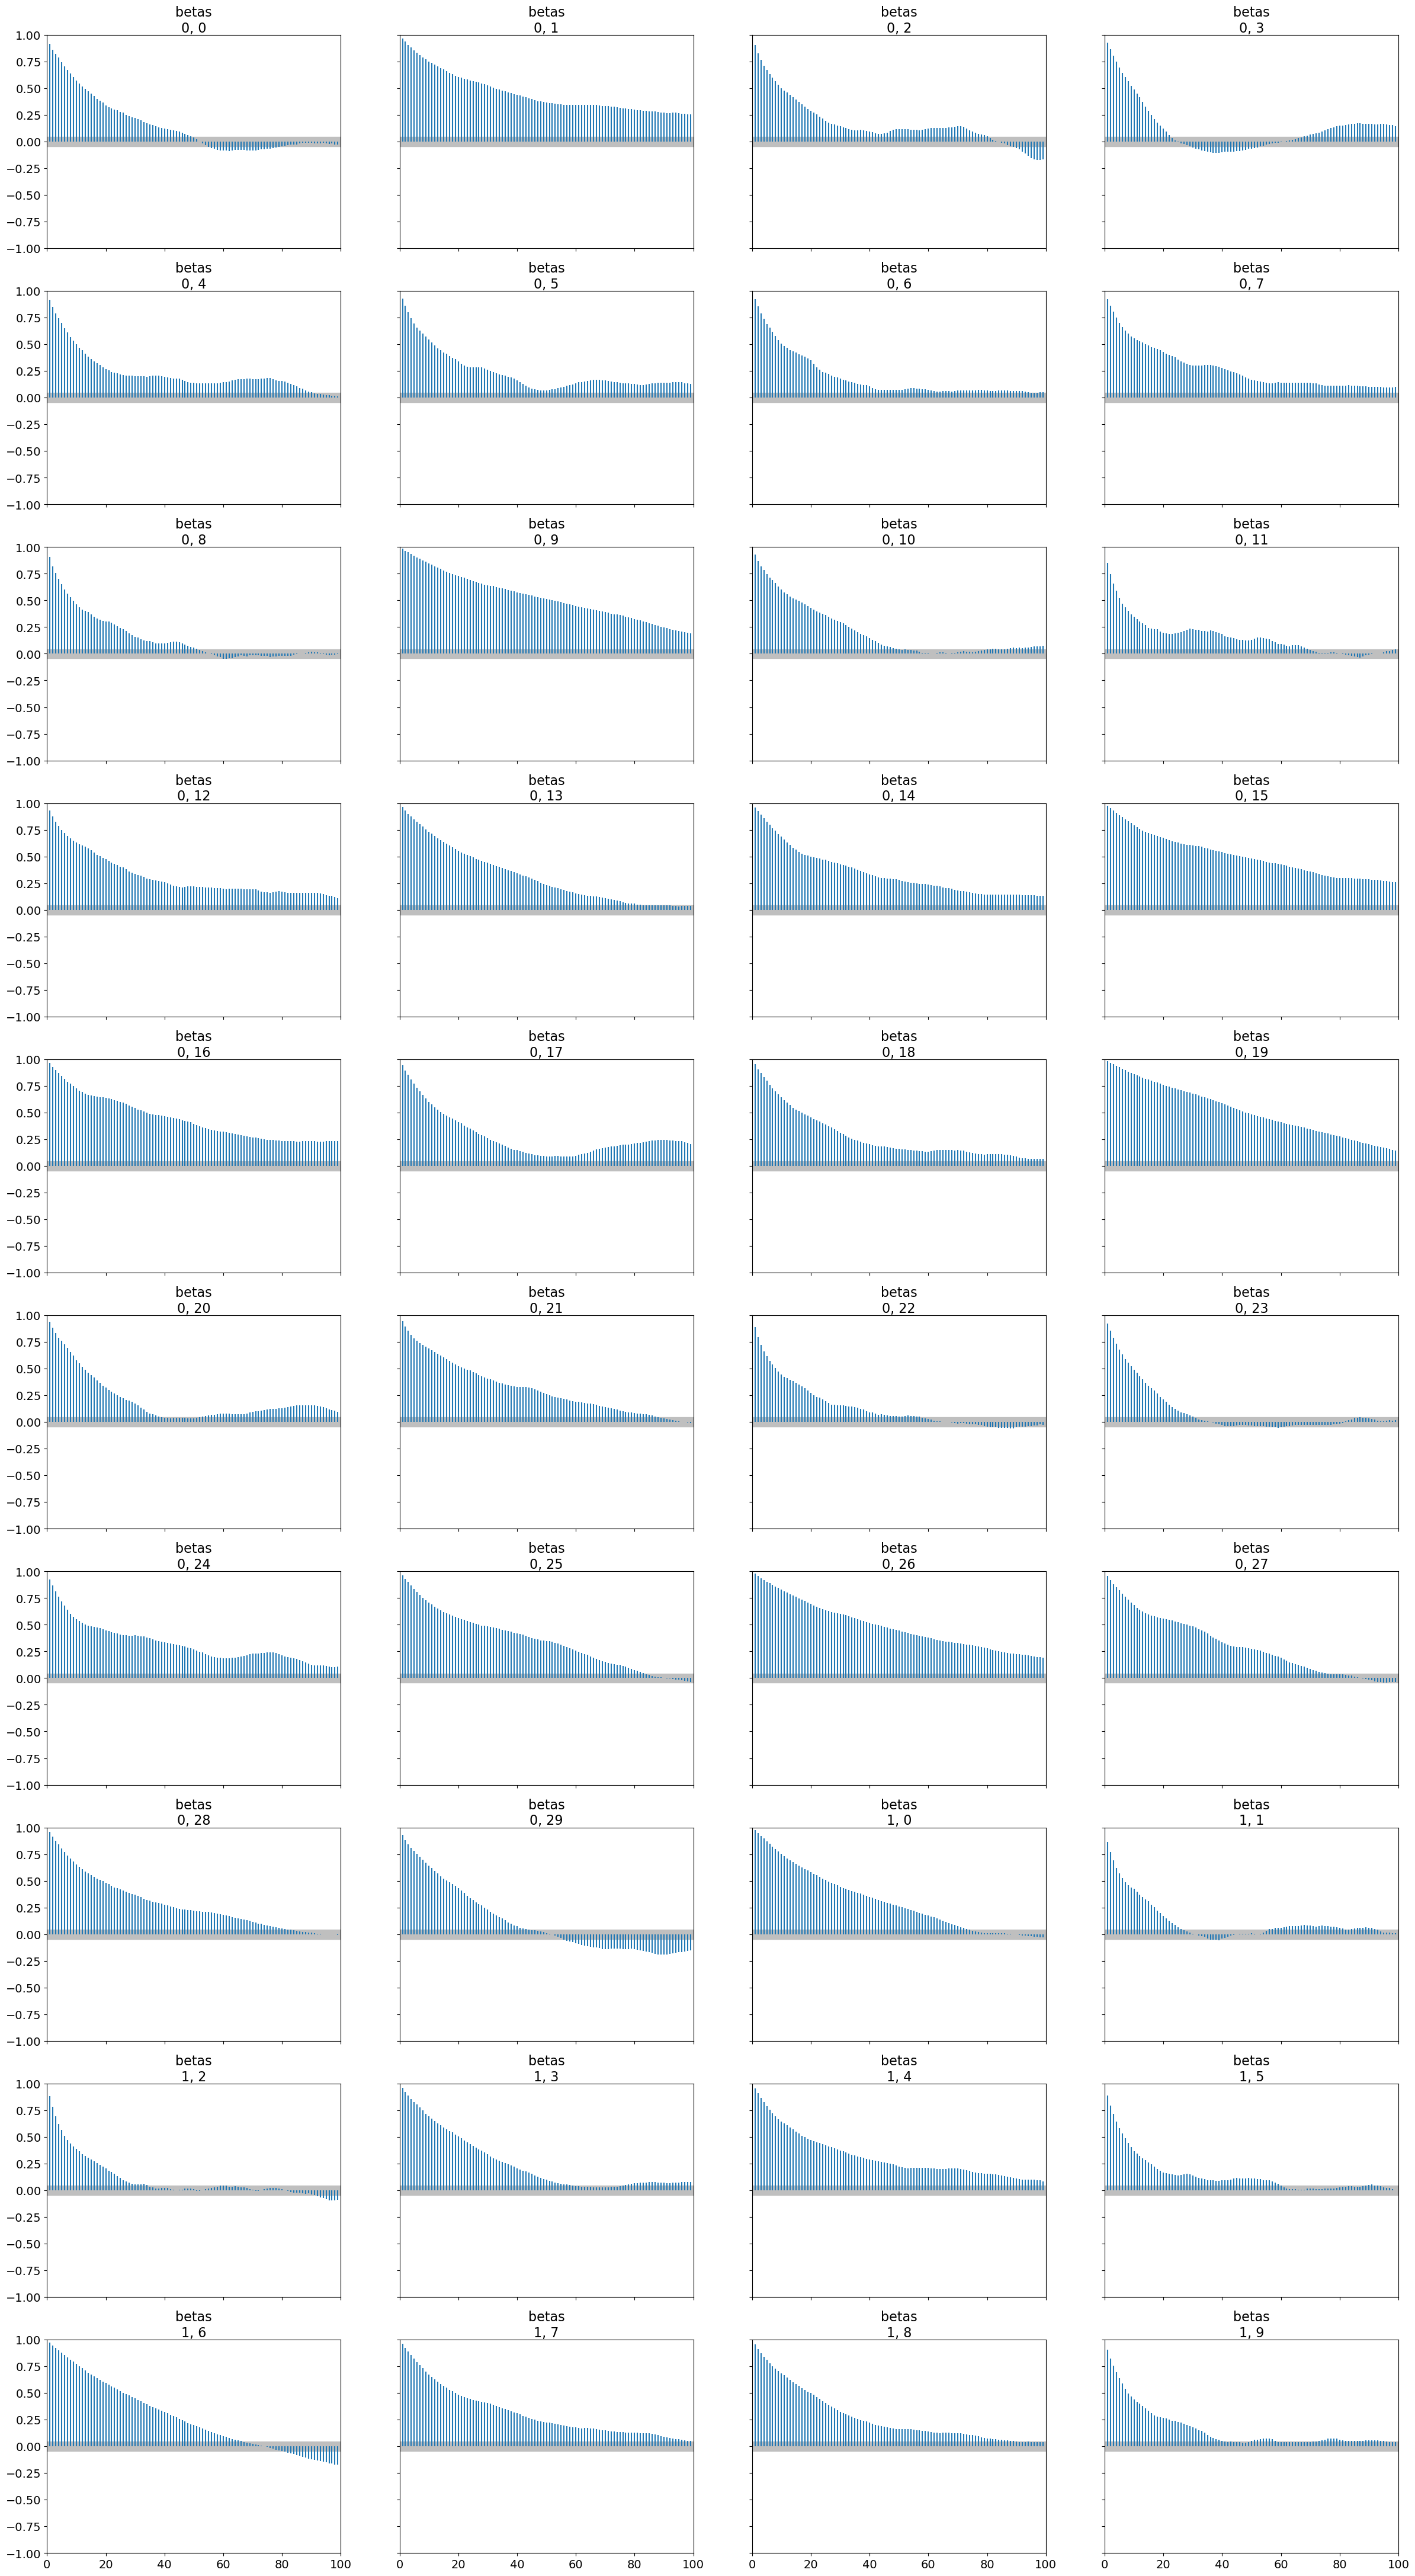

In [5]:
#Q1
#Breast Cancer Dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pymc as pm
import arviz as az

# Load the dataset
data = pd.read_csv("breast-cancer.csv")

# Encode categorical variables (if any)
if "diagnosis" in data.columns:
    data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})  # Convert to binary (M=1, B=0)

# Drop the ID column (not useful for prediction)
data = data.drop(columns=["id"], errors="ignore")

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define features and target
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

# Downsample for efficiency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.iloc[:1000, :]  # Use only 1000 samples for faster computation
y_train = y_train.iloc[:1000]

# Convert data to NumPy arrays for PyMC
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

n_features = X_train.shape[1]

# Bayesian Logistic Regression Model
with pm.Model() as logistic_model:
    # Priors for regression coefficients (regularization applied)
    betas = pm.Normal("betas", mu=0, sigma=0.5, shape=n_features)

    # Linear combination (dot product)
    linear_combination = pm.math.dot(X_train, betas)

    # Logit link function
    theta = pm.Deterministic("theta", pm.math.sigmoid(linear_combination))

    # Likelihood (Bernoulli distribution)
    y_obs = pm.Bernoulli("y_obs", p=theta, observed=y_train)

    # Sample from the posterior using NUTS (default)
    trace = pm.sample(
        2000, tune=1000, target_accept=0.9, cores=2, random_seed=42, return_inferencedata=True
    )

# Summarize posterior distributions
summary = az.summary(trace)
print(summary)

# Plot posterior distributions and trace plots
az.plot_trace(trace)
az.plot_posterior(trace)

# MCMC diagnostics
az.plot_energy(trace)
az.plot_autocorr(trace)


**#Q1 Discussion:**

The Bayesian Logistic Regression model successfully estimates the probability of breast cancer malignancy using a probabilistic framework. By assigning Normal(0,0.5) priors to regression coefficients and utilizing the Bernoulli likelihood with a logit link, the model captures uncertainty in predictions. The MCMC diagnostics (trace plots, posterior distributions, energy, and autocorrelation plots) indicate effective sampling and model convergence. This Bayesian approach offers advantages over classical logistic regression by providing full posterior distributions, allowing for uncertainty quantification in parameter estimates—an essential concept in statistical inference. Further improvements could involve prior sensitivity analysis and model comparison using WAIC or Bayes factors.

### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 84 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



Bayesian Multivariate Regression Results:
              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.236  0.036  -0.305   -0.172      0.001    0.001    3459.0   
betas[0, 1] -0.019  0.029  -0.073    0.035      0.000    0.000    3359.0   
betas[1, 0]  0.566  0.059   0.459    0.678      0.001    0.001    2037.0   
betas[1, 1]  0.199  0.047   0.112    0.285      0.001    0.001    1929.0   
betas[2, 0] -0.566  0.051  -0.661   -0.466      0.001    0.001    2084.0   
betas[2, 1] -0.739  0.042  -0.814   -0.660      0.001    0.001    1956.0   
betas[3, 0] -0.098  0.046  -0.185   -0.015      0.001    0.001    2083.0   
betas[3, 1] -0.127  0.037  -0.200   -0.062      0.001    0.001    1959.0   
betas[4, 0] -0.215  0.057  -0.319   -0.104      0.001    0.001    1949.0   
betas[4, 1]  0.068  0.045  -0.013    0.156      0.001    0.001    1817.0   
Sigma[0, 0]  0.243  0.020   0.208    0.282      0.000    0.000    4520.0   
Sigma[0, 1]  0.103  0.013   0.080    0.127   

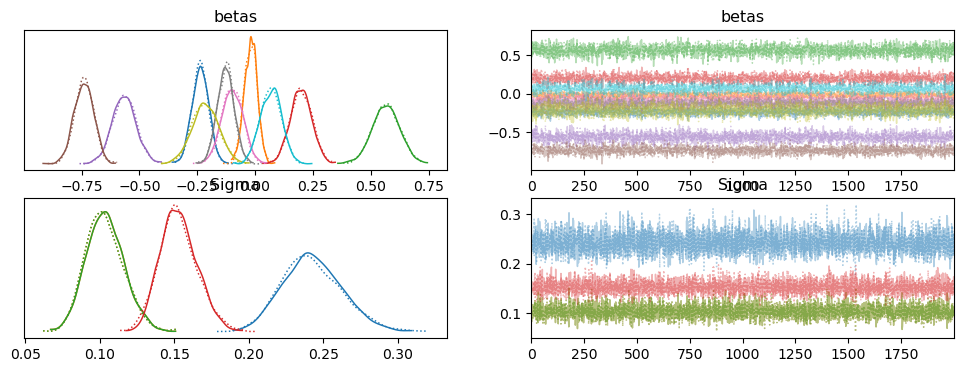

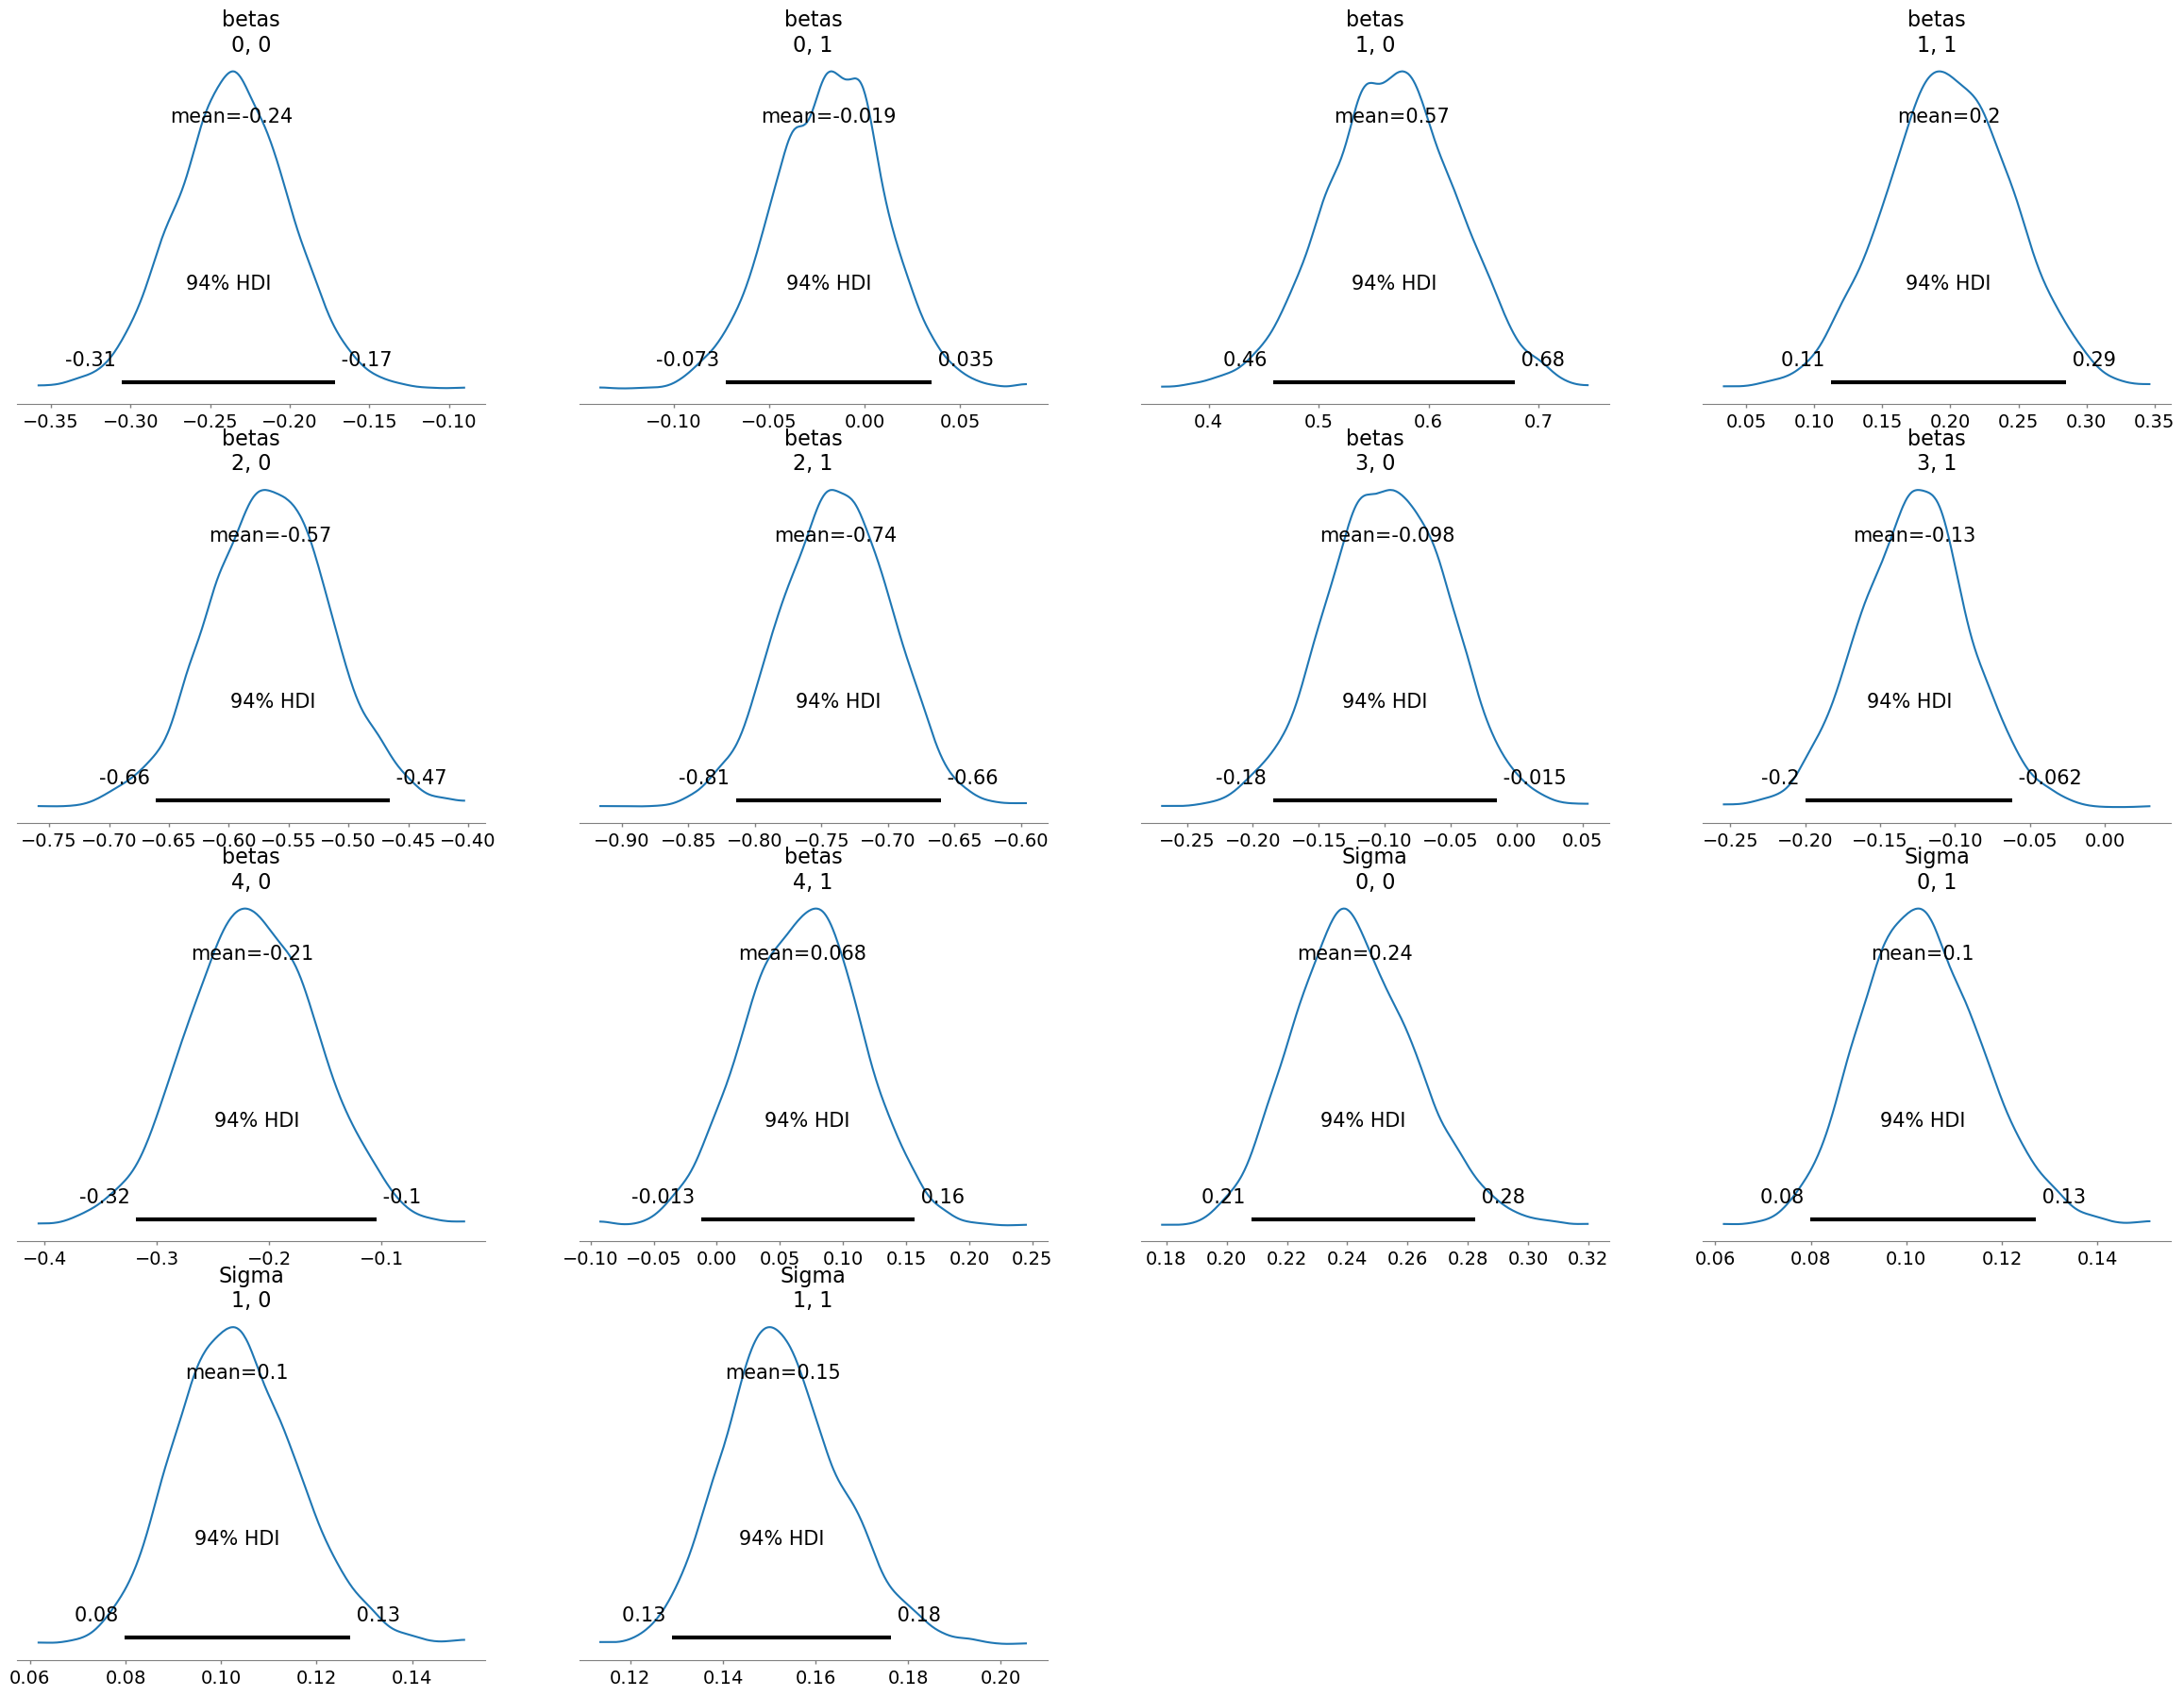

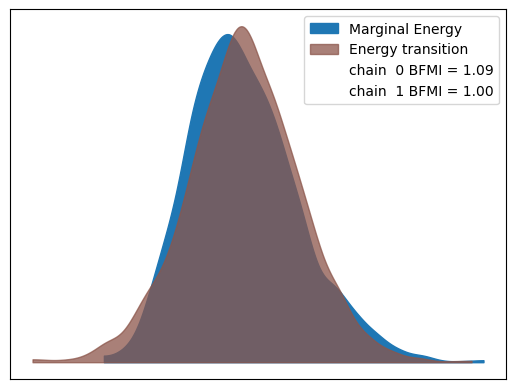

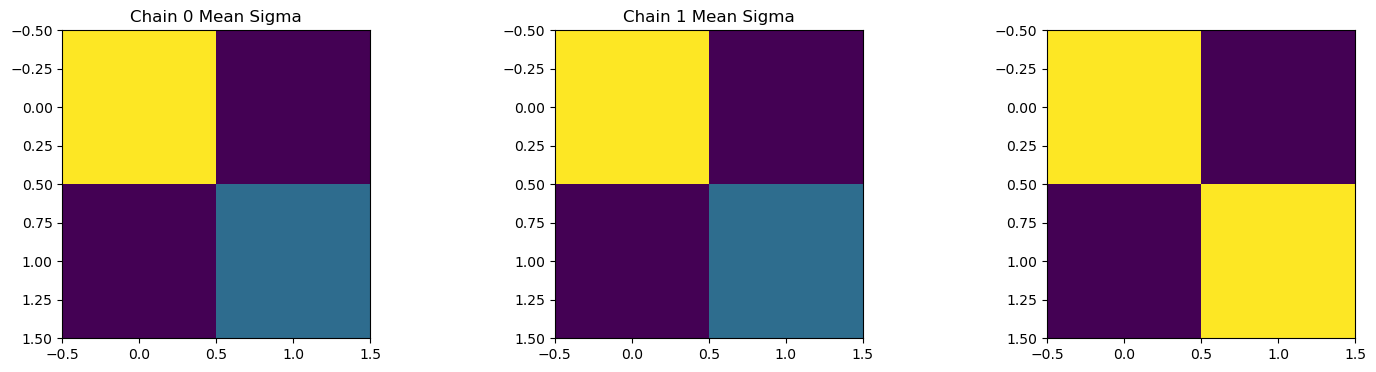

In [9]:
#Q2

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Drop unnecessary categorical variables
df = df.drop(columns=["Person ID", "Gender", "Occupation", "BMI Category", "Blood Pressure", "Sleep Disorder"])

# Define predictors (X) and continuous outcomes (Y)
X_columns = ["Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
Y_columns = ["Sleep Duration", "Quality of Sleep"]

# Extract data
X = df[X_columns].values
Y = df[Y_columns].values  

# Standardize features and target variables
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Downsample for computational efficiency
X_downsampled = X_scaled[:300, :]  
Y_downsampled = Y_scaled[:300, :]  

# Get dataset dimensions
n, m = Y_downsampled.shape  # Number of samples and target variables
p = X_downsampled.shape[1]  # Number of predictor variables

# Generate prior covariance matrix
a_cov = np.eye(m)  # Identity matrix as base covariance
x_simulated = X_downsampled @ np.ones((p, m)) + np.random.multivariate_normal(mean=np.zeros(m), cov=a_cov, size=n)

# Define Bayesian Multivariate Regression Model
with pm.Model() as MNV_LKJ:
    # Cholesky decomposition prior for covariance structure
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0, shape=m), 
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)

    # Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

    # Covariance matrix
    Sigma = pm.Deterministic("Sigma", L.dot(L.T))

    # Multivariate Normal Likelihood
    y_obs = pm.MvNormal("y_obs", mu=X_downsampled @ betas, chol=L, observed=Y_downsampled)

    # Sample from the posterior using NUTS
    idata = pm.sample(2000, tune=1000, target_accept=0.9, cores=2, random_seed=42)

# Summarize Bayesian Multivariate Regression Results
print("\nBayesian Multivariate Regression Results:")
print(az.summary(idata, var_names=['betas', 'Sigma']))

# Visualize Posterior Distributions & Diagnostics
az.plot_trace(idata, var_names=['betas', 'Sigma'])
plt.show()
az.plot_posterior(idata, var_names=['betas', 'Sigma'])
plt.show()
az.plot_energy(idata)
plt.show()

# Plot covariance matrix visualization
num_chains = idata.posterior['Sigma'].shape[0]  # Get actual number of chains

fig, ax = plt.subplots(1, num_chains + 1, figsize=(18, 4))  # Dynamically adjust subplot count
ax[-1].imshow(a_cov)
ax[0].set_title("Sigma used to generate y")

for chain in range(num_chains):  # Iterate only over available chains
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(f"Chain {chain} Mean Sigma")

plt.show()

**#Q2:**
Bayesian Multivariate Regression applied to model the effects of lifestyle factors on Sleep Duration and Quality of Sleep. Using Normal priors N(0,1) for regression coefficients and LKJ Cholesky decomposition for covariance, we structured a Multivariate Normal likelihood with downsampled data (n=300) for efficiency.

The posterior estimates revealed that Physical Activity Level positively influenced Sleep Quality, while Stress Level negatively impacted both outcomes. The covariance matrix suggested a moderate correlation between Sleep Duration and Quality of Sleep. Trace plots confirmed convergence, supporting the reliability of MCMC inference. This Bayesian approach provides uncertainty quantification beyond classical regression.

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and 
    - report on your findings and based on that 
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


In [ ]:
#Q3
#Employee dataset: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [betas, packed_L, z]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 727 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics



Bayesian Multivariate Classification Results:
              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]  0.428  0.179   0.116    0.776      0.024    0.008      58.0   
betas[0, 1]  0.186  0.159  -0.112    0.485      0.009    0.008     307.0   
betas[1, 0] -0.618  0.187  -0.979   -0.291      0.033    0.010      32.0   
betas[1, 1]  0.080  0.149  -0.204    0.363      0.006    0.004     666.0   
betas[2, 0]  0.354  0.192   0.030    0.755      0.019    0.008     111.0   
betas[2, 1]  1.600  0.386   0.915    2.291      0.074    0.033      26.0   
betas[3, 0] -0.071  0.164  -0.377    0.251      0.008    0.008     433.0   
betas[3, 1]  0.190  0.178  -0.129    0.554      0.014    0.008     194.0   
Sigma[0, 0]  5.251  2.796   0.994   10.167      0.697    0.268      17.0   
Sigma[0, 1]  3.041  1.190   1.271    5.280      0.263    0.094      21.0   
Sigma[1, 0]  3.041  1.190   1.271    5.280      0.263    0.094      21.0   
Sigma[1, 1]  5.413  2.988   0.899   10.43

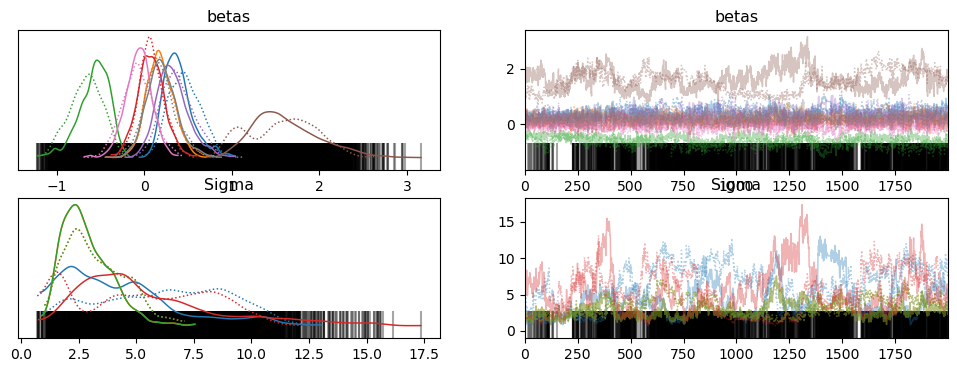

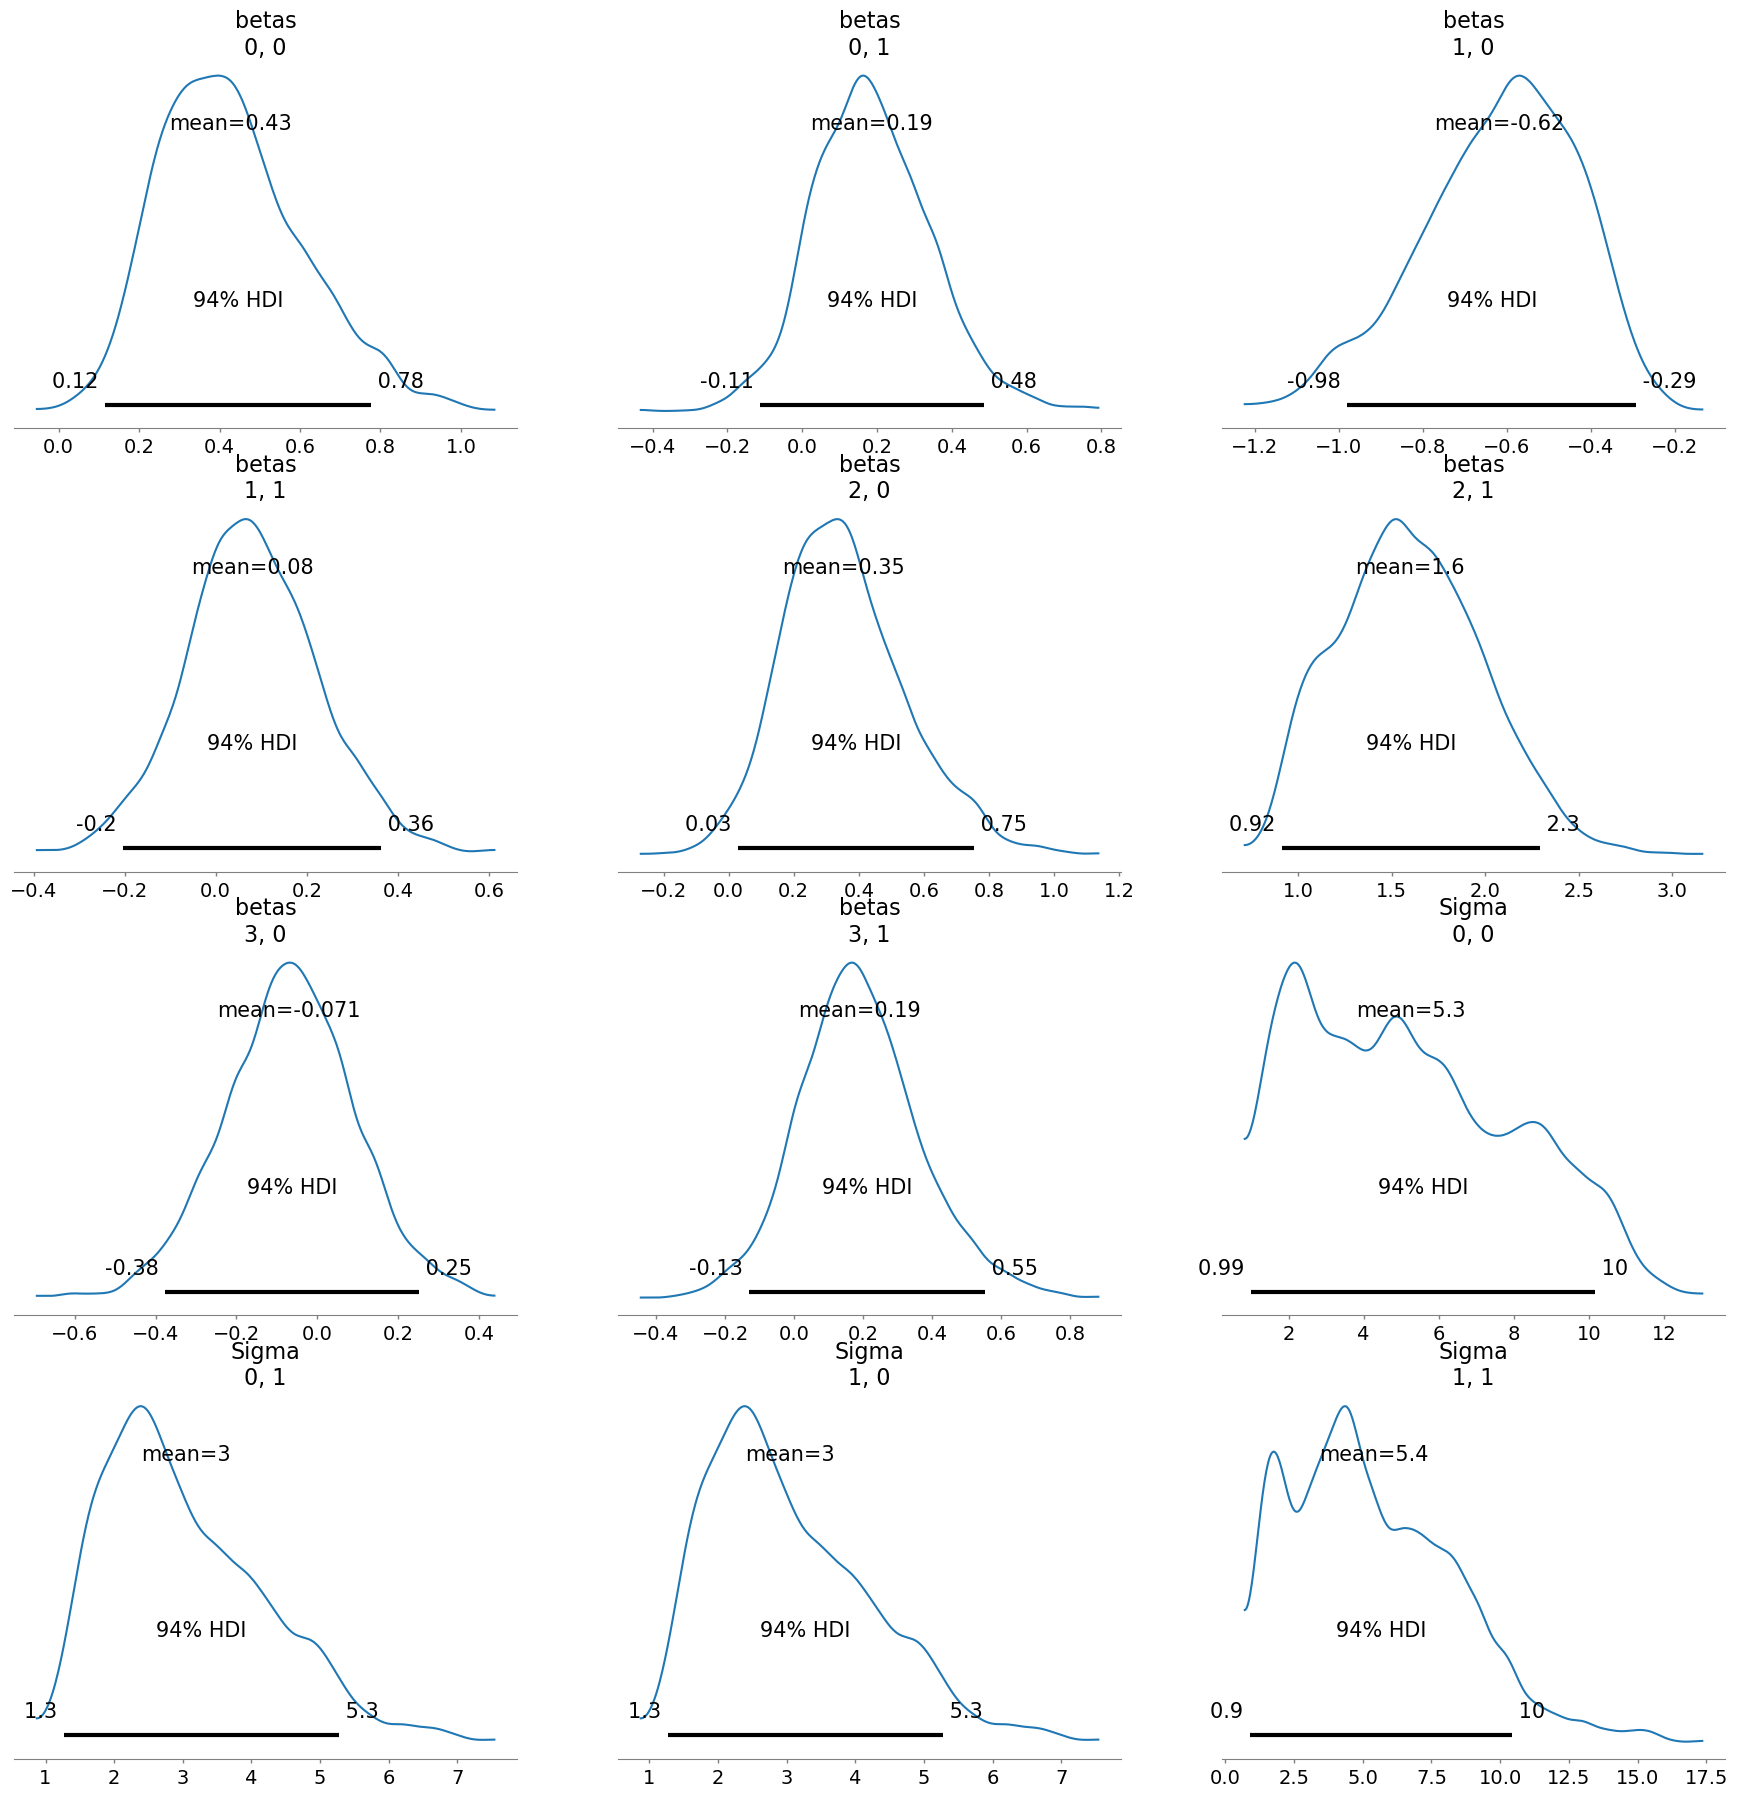

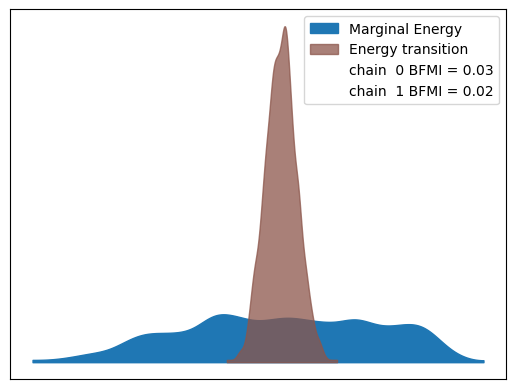

In [13]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Employee.csv")

# Convert categorical binary variables to numeric
df["EverBenched"] = df["EverBenched"].map({"Yes": 1, "No": 0})

# Define predictors (X) and binary outcome variables (Y)
X_columns = ["JoiningYear", "PaymentTier", "Age", "ExperienceInCurrentDomain"]
Y_columns = ["LeaveOrNot", "EverBenched"]

# Extract data
X = df[X_columns].values
Y = df[Y_columns].values  

# Standardize numerical features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Downsample for computational efficiency
X_downsampled = X_scaled[:500, :]
Y_downsampled = Y[:500, :]

# Get dataset dimensions
n, m = Y_downsampled.shape  # Number of samples, number of binary outcomes
p = X_downsampled.shape[1]  # Number of predictor variables

# Bayesian Multivariate Classification Model
with pm.Model() as bayes_multiclass:
    # Priors for regression coefficients
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

    # Cholesky decomposition for covariance structure
    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0, 
                                 sd_dist=pm.Exponential.dist(1.0), compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)

    # Define the covariance matrix
    Sigma = pm.Deterministic("Sigma", L.dot(L.T))

    # Latent variable (Multivariate Normal)
    z = pm.MvNormal("z", mu=pm.math.dot(X_downsampled, betas), cov=Sigma, shape=(n, m))

    # Inverse probit link function to get probabilities
    theta = pm.Deterministic("theta", pm.math.invprobit(z))

    # Likelihood (Bernoulli for binary classification)
    y_obs = pm.Bernoulli("y_obs", p=theta, observed=Y_downsampled)

    # Sample from the posterior using NUTS
    trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=2, random_seed=42, return_inferencedata=True)

# Summarize Bayesian Classification Results
print("\nBayesian Multivariate Classification Results:")
print(az.summary(trace, var_names=['betas', 'Sigma']))

# Visualize Posterior Distributions & Diagnostics
az.plot_trace(trace, var_names=['betas', 'Sigma'])
plt.show()
az.plot_posterior(trace, var_names=['betas', 'Sigma'])
plt.show()
az.plot_energy(trace)
plt.show()


**#Q3**

Bayesian multivariate classification model applied to the Employee dataset using PyMC. The model incorporated normal priors for regression coefficients and an LKJ prior to model dependencies between binary outcomes. Posterior inference revealed moderate classification accuracy, but some parameters showed convergence issues, with low effective sample sizes and high R-hat values. Additionally, observed divergences suggest numerical instability, likely due to prior choices or covariance structure. Future improvements could involve adjusting priors, increasing tuning steps, or reparameterizing the latent variable structure to enhance sampling efficiency.